# Daily and Sports Activities Data Set

## Chhean Quentin - Marroufin Maxime

### __Description of data set__

The dataset given is a collection of motion sensor data collected during differents kinds of exercices.<br>
8 subjects were asked to perform 19 differents exercices for 5 minutes. During these exercices, we save the signals given by the sensors from 5 differents units <br>
 <br>
The 5 units are :
- Torso (T)
- Right Arm (RA)
- Left Arm (LA)
- Right Leg (RL)
- Left Leg (LL) <br>
 <br>

The 19 exercices are :
- Sitting (A1)
- Standing (A2)
- Lying on the back (A3)
- Lying on the right side (A4)
- Ascending stairs (A5)
- Descending stairs (A6)
- Standing in an elevator still (A7)
- Moving around an elevator (A8)
- Walking in a parking lot (A9)
- Walking on a treadmill at 4km/h with no inclinaison (A10)
- Walking on a treadmill at 4km/h with a 15 degree inclinaison (A11)
- Running on a treadmill at 8 km/h (A12)
- Exercising on a stepper (A13)
- Exercising on a cross trainer (A14)
- Cycling in horizontal position (A15)
- Cycling in vertical position (A16)
- Rowing (A17)
- Jumping (A18)
- Playing Basketball (A19) <br>
 <br>

__File Structure__ <br>

- Folders a1 to a19 for the 19 activities
- Folders p1 to p8 for the 8 subjects doing the exercises
- Text files from s01 to s60 representing a 5 seconds segment of the 5 minutes exercise <br>

Each text file is a 45 columns x 152 rows array :
- Columns : there are 9 sensors on each 5 units that measures acceleration, rotational movement (gyro) and magnitude on all 3 axis (T_xacc, T_yacc, T_zacc, T_xgyro..., T_xmag..., RA_xacc,..., LA_xacc,..., RL_xacc,..., LL_xacc...), we got 5x9 = 45 columns.
- Rows: The sampling rate is 25HZ so for 5 seconds, we got 5x25 = 125 rows

Let's try to find a model to fit our data. <br>

In [202]:
#Importing pandas
import pandas as pd

#Importing matplotlib and pylab for data plotting and visualization
import matplotlib.pyplot as plt
import pylab

#Importing os for data import and path issues
import os

#Importing numpy for scientific computaion
import numpy as np

#Importing sklearn for classification models and PCA reduction
import sklearn as sk
import sklearn.tree
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

### __Exploratory analysis__

Let's vizualize one simple example : Person n°1 doing the sitting exercise (A1) for the 5 first seconds

In [203]:
path = os.path.join(os.path.abspath(''), r"data\a01\p1\s01.txt")
data_p1_a1_1 = pd.read_csv(path)

data_columns = []
units = ["T","RA","LA","RL","LL"]
movs = ["acc","gyro","mag"]
axises = ["x","y","z"]

#Creating the columns names
def create_data_col():
    for unit in units :
        for mov in movs :
            for axis in axises :
                name_col = "{}_{}{}".format(unit, axis, mov)
                data_columns.append(name_col)
                
create_data_col()
data_p1_a1_1.columns = data_columns

data_p1_a1_1

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,RL_zmag,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag
0,8.1305,1.0202,5.3843,-0.009368,0.023485,0.001953,-0.78717,-0.068275,0.15890,0.71829,...,-0.034005,-2.8146,-9.0737,2.6218,-0.014784,-0.016477,0.002789,0.73937,0.30183,-0.057514
1,8.1604,1.0201,5.3622,0.015046,0.014330,0.000204,-0.78664,-0.068277,0.15879,0.69849,...,-0.036489,-2.8221,-9.0886,2.6366,-0.012770,0.005717,-0.007918,0.73955,0.30052,-0.057219
2,8.1603,1.0052,5.3770,0.006892,0.018045,0.005649,-0.78529,-0.069849,0.15912,0.72799,...,-0.036151,-2.8071,-9.0811,2.6070,-0.005725,0.009620,0.006555,0.74029,0.30184,-0.057750
3,8.1605,1.0275,5.3473,0.008811,0.030433,-0.005346,-0.78742,-0.068796,0.15916,0.71572,...,-0.033807,-2.8146,-9.0737,2.6218,-0.003929,-0.008371,0.002816,0.73845,0.30090,-0.057527
4,8.1454,1.0201,5.3919,0.007001,0.029523,-0.008080,-0.78716,-0.070603,0.15905,0.71323,...,-0.035693,-2.8072,-9.0886,2.6070,-0.014559,0.016500,-0.006040,0.74009,0.30065,-0.056939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,7.9515,1.1242,5.6378,-0.010269,0.023425,-0.009024,-0.79241,-0.069590,0.13582,0.64127,...,-0.035498,-2.8079,-9.0825,2.6100,-0.000123,-0.002476,-0.021531,0.73889,0.30092,-0.057689
120,7.9442,1.1466,5.6080,0.006786,0.001938,0.002946,-0.79034,-0.069965,0.13456,0.61924,...,-0.036453,-2.8229,-9.0750,2.6247,0.001349,0.006134,0.004760,0.73996,0.30132,-0.057530
121,7.9517,1.1466,5.6081,0.000527,0.023588,0.010141,-0.79174,-0.069147,0.13343,0.61443,...,-0.034847,-2.8229,-9.0750,2.6247,-0.005735,-0.001302,-0.007031,0.73945,0.30342,-0.056789
122,7.9743,1.1542,5.5038,0.025818,0.005417,0.006603,-0.79166,-0.070216,0.13478,0.60929,...,-0.035543,-2.8229,-9.1124,2.6246,-0.020267,0.000585,0.000255,0.74030,0.30027,-0.056704


We assing each column to its measure. <br>
Now let's try to plot the curves

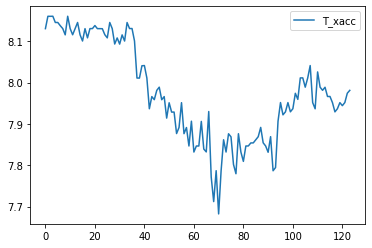

In [204]:
data_p1_a1_1.plot(kind='line',y='T_xacc')

Here is the curve of the x axis acceleration of the torso <br>
What if we try to plot all 45 signals ?

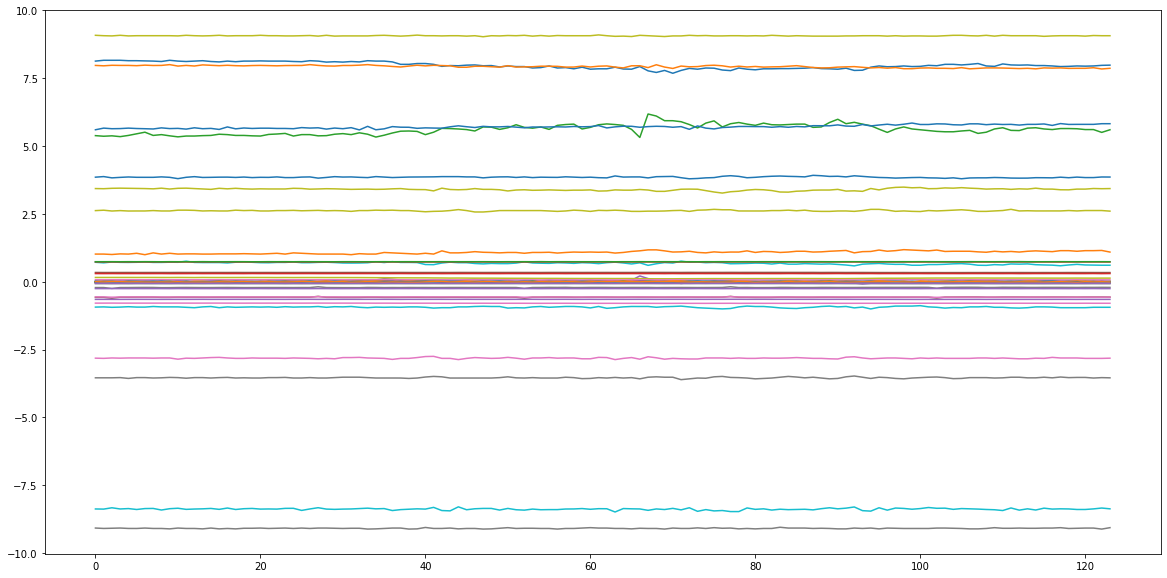

In [205]:
data_p1_a1_1.plot(figsize=(20,10), legend=None) #We hide the legend because it takes too much place and it isn't relevant

Looks like the signal might be approximated to a constant value. <br>
We'll try to plot the entire curve for the whole exercice during 5 minutes to see if the hypothesis can be validated. <br>

In [206]:
pathlist = [(os.path.join(os.path.abspath(''), r"data\a02\p1\s"))+("%.2d" % i)+(".txt") for i in range (1,61)] #Create a list of paths for the 60 files

In [209]:
#Merging all 60 files into one dataframe to plot it

frame_list = []

for path in pathlist :
    df = pd.read_csv(path)
    df.columns = data_columns
    frame_list.append(df)

data_p1_a1 = pd.concat(frame_list, ignore_index=True)

data_p1_a1

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,RL_zmag,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag
0,8.4074,0.58114,4.9968,-0.012419,0.016024,-0.000235,-0.67840,-0.54858,-0.11146,8.8732,...,-0.53216,-9.7594,0.75763,-0.75441,0.004510,-0.000533,-0.008484,0.40895,-0.040697,0.64136
1,8.4148,0.62520,5.0792,0.011207,0.037455,0.004271,-0.67821,-0.54893,-0.11277,8.9075,...,-0.53252,-9.7743,0.78011,-0.75460,-0.013637,0.000449,-0.001191,0.40836,-0.039415,0.64250
2,8.3850,0.58120,5.0265,-0.006789,0.042666,-0.016759,-0.67764,-0.54895,-0.11209,8.8706,...,-0.53152,-9.7368,0.79495,-0.77634,-0.013638,-0.002250,-0.001227,0.40910,-0.039676,0.64357
3,8.4000,0.61065,5.0417,-0.001427,0.031929,-0.013054,-0.67704,-0.54919,-0.11312,8.8610,...,-0.53002,-9.7518,0.77998,-0.74675,-0.013554,-0.004187,-0.008469,0.40885,-0.039406,0.64199
4,8.4448,0.61047,4.9973,-0.005130,0.028590,0.004285,-0.67823,-0.54815,-0.11318,8.8807,...,-0.53149,-9.7519,0.73524,-0.76928,0.004584,0.014666,-0.010195,0.40849,-0.040320,0.64226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7435,8.4419,0.61716,5.0473,0.061957,0.014761,0.014419,-0.67495,-0.55391,-0.11894,9.0408,...,-0.53108,-9.7867,0.52562,-0.69717,-0.004191,0.010002,-0.017629,0.41138,-0.028602,0.64328
7436,8.4568,0.57298,4.9501,-0.004117,0.010563,0.002486,-0.67477,-0.55458,-0.11812,8.9992,...,-0.53246,-9.7793,0.51069,-0.71202,-0.008040,0.010356,0.000470,0.41145,-0.028609,0.64421
7437,8.4571,0.58080,4.8457,0.026778,0.036441,0.012444,-0.67337,-0.55332,-0.11700,9.0042,...,-0.53181,-9.7643,0.48079,-0.72679,-0.002785,-0.000180,0.010330,0.41182,-0.028865,0.64370
7438,8.4568,0.57292,4.9651,0.017742,0.038246,0.006046,-0.67383,-0.55375,-0.11553,9.0311,...,-0.53364,-9.7867,0.51073,-0.71215,-0.008191,-0.007420,0.007591,0.41049,-0.027957,0.64390


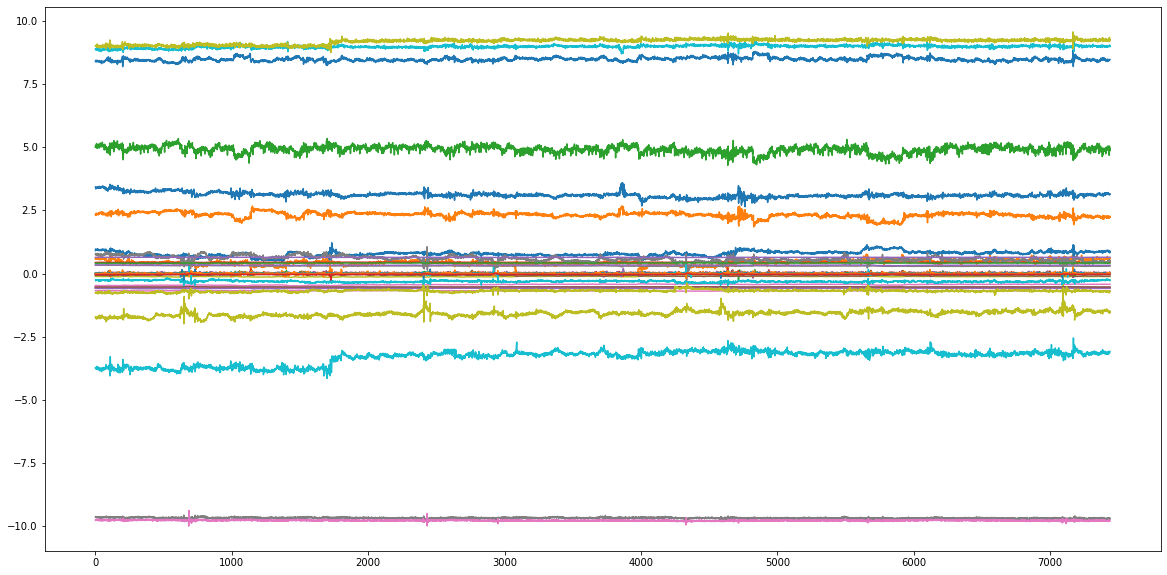

In [210]:
data_p1_a1.plot(figsize=(20,10), legend=None)

Looks like the hypothesis is true : overall, each signal seems constant <br>
Now let's check for another exercice from the same person and the same exercice from another person to see if the hypothesis generalizes to all person/exercises <br>

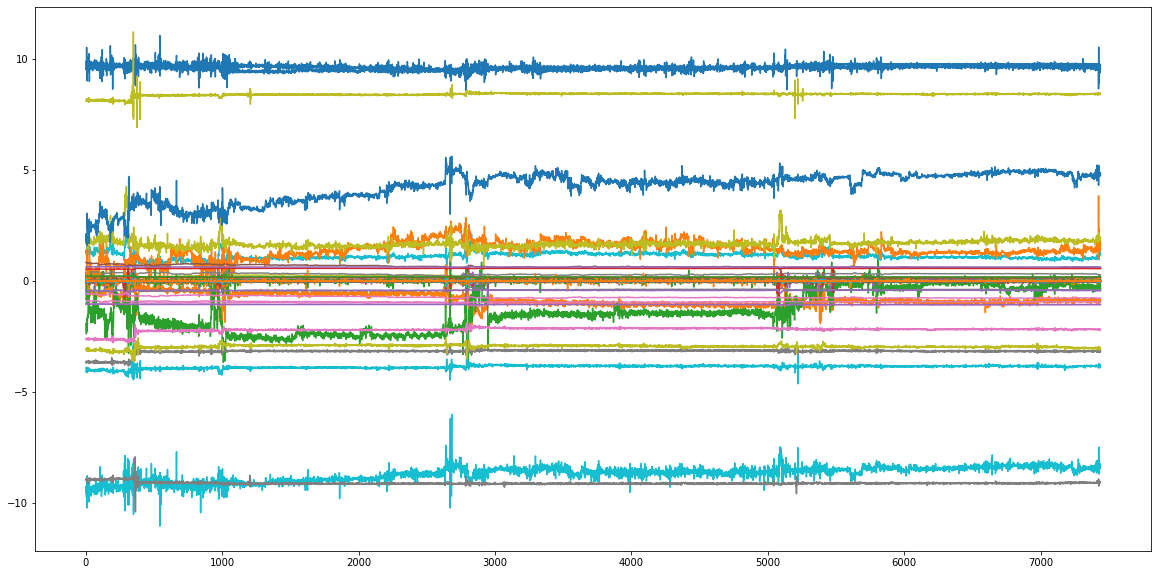

In [211]:
# Same exercice from person n°2

pathlist = [(os.path.join(os.path.abspath(''), r"data\a01\p2\s"))+("%.2d" % i)+(".txt") for i in range (1,61)]

frame_list = []

for path in pathlist :
    df = pd.read_csv(path)
    df.columns = data_columns
    frame_list.append(df)

data_p2_a1 = pd.concat(frame_list, ignore_index=True)

data_p2_a1.plot(figsize=(20,10), legend=None)

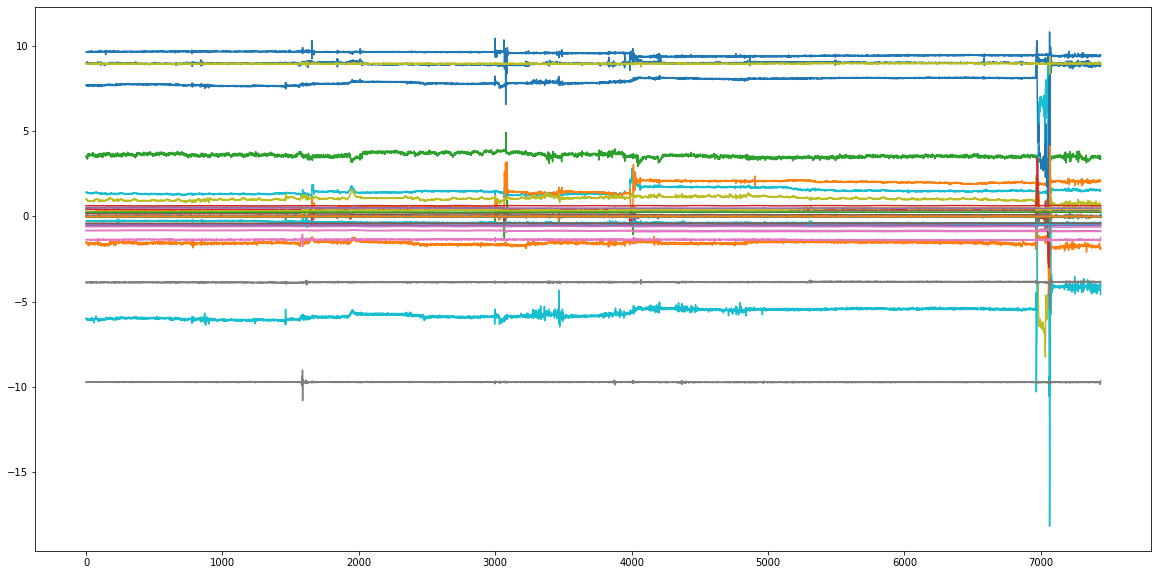

In [11]:
# Same exercice from person n°3

pathlist = [(os.path.join(os.path.abspath(''), r"data\a01\p3\s"))+("%.2d" % i)+(".txt") for i in range (1,61)]

frame_list = []

for path in pathlist :
    df = pd.read_csv(path)
    df.columns = data_columns
    frame_list.append(df)

data_p3_a1 = pd.concat(frame_list, ignore_index=True)

data_p3_a1.plot(figsize=(20,10), legend=None)

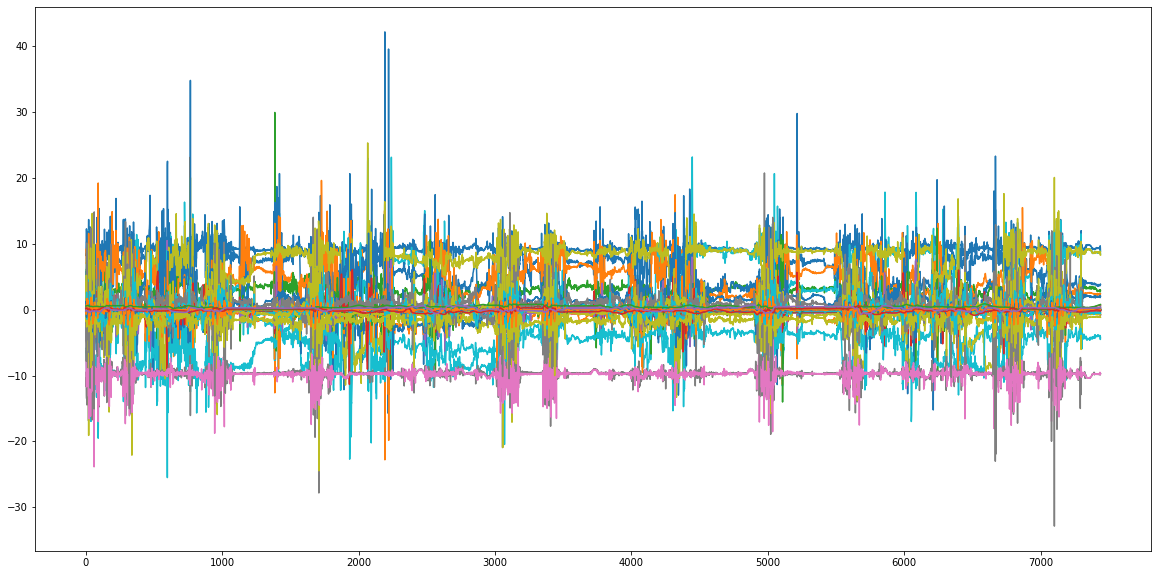

In [212]:
# Exercice n°8 from person n°1

pathlist = [(os.path.join(os.path.abspath(''), r"data\a08\p1\s"))+("%.2d" % i)+(".txt") for i in range (1,61)]

frame_list = []

for path in pathlist :
    df = pd.read_csv(path)
    df.columns = data_columns
    frame_list.append(df)

data_p1_a2 = pd.concat(frame_list, ignore_index=True)

data_p1_a2.plot(figsize=(20,10), legend=None)

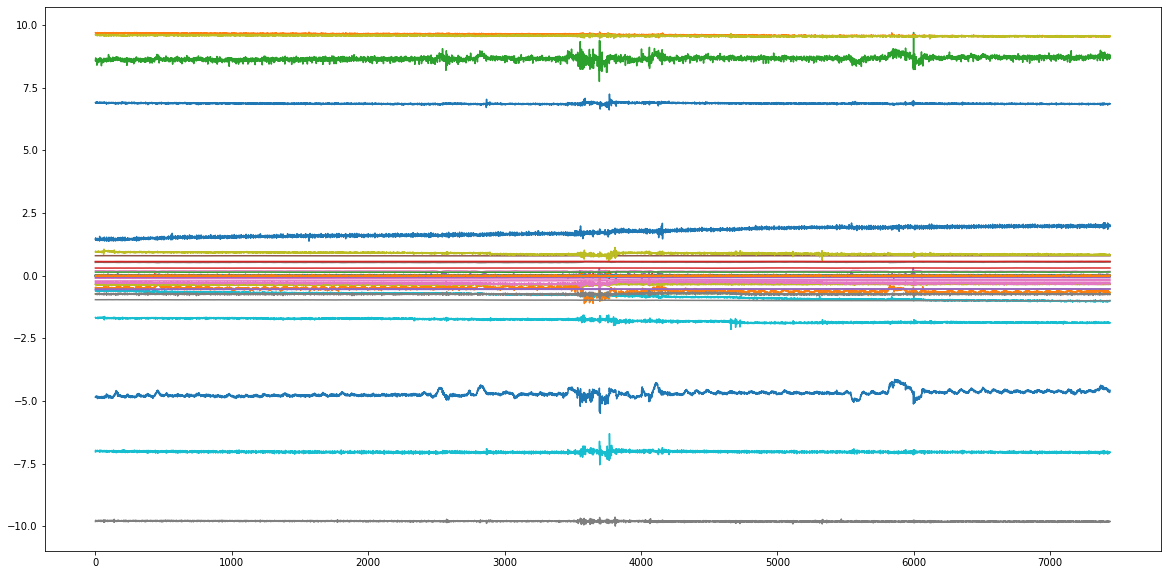

In [213]:
# Exercice n°3 from person n°1

pathlist = [(os.path.join(os.path.abspath(''), r"data\a03\p1\s"))+("%.2d" % i)+(".txt") for i in range (1,61)]

frame_list = []

for path in pathlist :
    df = pd.read_csv(path)
    df.columns = data_columns
    frame_list.append(df)

data_p1_a3 = pd.concat(frame_list, ignore_index=True)

data_p1_a3.plot(figsize=(20,10), legend=None)

### __Data cleaning__

Even if the mean value of each signal seems constant, some of them have higher variance than the others depending on the exercice. <br>
In conclusion, we can suppose that on each 45 signals, we can assign 2 propeties : the mean and the variace. <br>
We will then reduce each signal to its mean and its variance.

In [214]:
# Creating X and y with every example for each exercice

#X is a 2D array where columns are the 90 (45*2) features of the exercice, and an row represents one sample
#y is the array label, where the value of index i matches the number of the exercice of row i in X

number_person = ["1", "2", "3", "4", "5", "6", "7", "8"]
number_exercice = [("%.2d" % i) for i in range(1,20)]
number_sample = [("%.2d" % i) for i in range(1,61)]

mean_list = []
var_list = []
one_sample = []

X =[]
y=[]

for i in range(1,19) : #Index of the exercices
    for j in range (1,9) : #Index of the examples - Number of person
        for k in range (1,61) : #Index of the examples - Number of samples per person
            x =[]
            path = os.path.join(os.path.abspath(''), r"data\a"+str(i).zfill(2)+"\p"+str(j)+"\s"+str(k).zfill(2)+".txt")

            df = pd.read_csv(path)

            mean_list = df.mean(axis = 0).tolist()
            var_list = df.var(axis = 0).tolist()

            for s in range(0,45):
                x.append(mean_list[s])
                x.append(var_list[s])
            y.append(i)
            X.append(x)


print('done')

done


In [215]:
data_columns_mv = []

def create_data_col_mv():
    for namecol in data_columns :
        for mean_or_var in ["mean", "var"] : 
                name_col = "{}_{}".format(namecol, mean_or_var)
                data_columns_mv.append(name_col)

create_data_col_mv()

full_data = pd.DataFrame(X, columns = data_columns_mv, index = y)

full_data

,T_xacc_mean,T_xacc_var,T_yacc_mean,T_yacc_var,T_zacc_mean,T_zacc_var,T_xgyro_mean,T_xgyro_var,T_ygyro_mean,T_ygyro_var,...,LL_ygyro_mean,LL_ygyro_var,LL_zgyro_mean,LL_zgyro_var,LL_xmag_mean,LL_xmag_var,LL_ymag_mean,LL_ymag_var,LL_zmag_mean,LL_zmag_var
1,7.974466,0.014316,1.083540,0.002207,5.608340,0.032759,0.005013,0.000243,0.026318,0.001322,...,0.002281,0.000052,-0.003144,0.000050,0.739610,7.262268e-07,0.301320,6.267786e-07,-0.057114,6.803215e-07
1,7.978344,0.007611,1.140643,0.000784,5.598304,0.018989,0.003380,0.000167,0.022478,0.000782,...,0.001648,0.000046,-0.003847,0.000050,0.740590,9.377770e-07,0.301912,7.137002e-07,-0.057269,7.088033e-07
1,7.971532,0.003065,1.140978,0.000512,5.607023,0.008015,0.001747,0.000103,0.018726,0.000275,...,0.001505,0.000045,-0.003763,0.000043,0.740976,7.665946e-07,0.302471,5.757194e-07,-0.057057,6.157006e-07
1,7.938427,0.003793,1.165354,0.002189,5.649107,0.009152,0.003792,0.000261,0.023718,0.000482,...,0.002144,0.000041,-0.003738,0.000061,0.741136,6.724832e-07,0.302382,5.399978e-07,-0.056421,8.074845e-07
1,7.909072,0.001753,1.187426,0.000667,5.679148,0.004469,0.001452,0.000181,0.012885,0.000512,...,0.001875,0.000047,-0.002549,0.000044,0.741043,7.215742e-07,0.302977,6.842391e-07,-0.055803,6.902201e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,9.359577,135.251860,-2.614807,9.218677,2.859337,11.567206,0.018824,0.115610,0.015680,0.524819,...,-0.005472,1.758229,-0.007116,0.556930,0.424591,2.920274e-03,0.196424,9.375386e-04,0.625558,9.089896e-04
18,8.788385,146.095850,-2.443813,9.223696,2.577167,12.047276,0.013529,0.087285,0.008851,0.531106,...,-0.016847,2.041929,0.016590,0.554609,0.424735,3.193298e-03,0.192298,9.920565e-04,0.624914,9.676484e-04
18,9.489873,130.277390,-2.422986,6.664571,2.572907,10.828030,-0.015672,0.077057,0.068262,0.445067,...,0.055468,2.169844,-0.004731,0.441991,0.417442,2.970791e-03,0.167766,9.171535e-04,0.632005,8.963906e-04
18,9.212217,136.243504,-2.365414,7.567266,2.496980,10.272912,0.009405,0.092326,0.010558,0.444090,...,0.073528,1.823516,-0.000982,0.428757,0.427856,3.051095e-03,0.171771,5.835064e-04,0.624272,1.033393e-03


As we can see, we have now cleaned our data : from a continuous signal, we reduced the information to the signal's mean and variance and put all the information to a single DataFrame

### __Main analysis: objective & methods adopted__

We have examples of differents signals depending on the exercice. <br>
To model this problem, we will be dealing with a classification problem : given the 90 parameters (45 signals * 2 (mean or variance)), guess which of the 19 exercices a person is doing. <br>
We will implement differents models and check which one works the best :
- Logistic Regression
- Support Vector Machine (SVM)
- Decision Tree
- Multi-Layer Perceptron / Neural Network (MLP)

In [216]:
#PCA Projection
#We will use PCA projection to visualize the data in 2D

# Standardizing the features, e.g mean to 0 and variance to 1
X = StandardScaler().fit_transform(X)

In [217]:
#Creating the PCA object and fitting it to our data X
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [218]:
#Concatenating our now 2D data to the label y (number of exercice)
finalDf = pd.concat([principalDf, pd.DataFrame(y)], axis = 1)

In [219]:
finalDf.columns = ['principal component 1', 'principal component 2', 'target']
finalDf

,principal component 1,principal component 2,target
0,-3.394215,0.713144,1
1,-3.389998,0.701491,1
2,-3.383000,0.706998,1
3,-3.391642,0.710589,1
4,-3.375628,0.726944,1
...,...,...,...
8635,5.975001,-1.259824,18
8636,6.258415,-1.012718,18
8637,5.580365,-1.549980,18
8638,5.311417,-1.354356,18


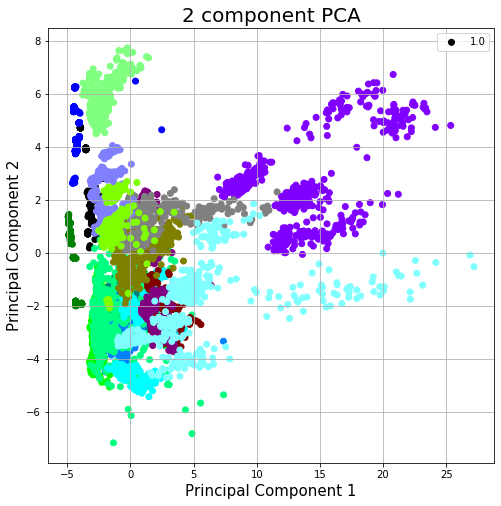

In [220]:
#Drawing the 2-component PCA

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = y
colors = []

#Creating the colors array
for r in [0, 0.5, 1] : 
    for g in [0, 0.5, 1] :
        for b in [0, 0.5, 1] :
            colors.append((r,g,b))

            
datas = finalDf.values.tolist()
x_plot = [ data[0] for data in datas ]
y_plot = [ data[1] for data in datas ]
targets = [ data[2] for data in datas ]

ax.scatter(x=x_plot,y=y_plot,c = [colors[int(target-1)] for target in targets ])
    
ax.legend(targets)
ax.grid()

Projecting with PCA in dimesion 2 gives us an idea of how data groups in clusters depending of what exercice is done.

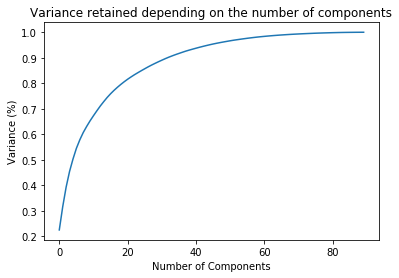

In [223]:
#Dimensionnality reduction with PCA
#Let's use PCA to reduce our dimension while keeping our variance at p%

pcaModel = PCA().fit(X)

plt.figure()
plt.plot(np.cumsum(pcaModel.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Variance retained depending on the number of components')
plt.show()

In [225]:
p = 0.90
pca = PCA(p)
pca.fit(X)
X = pca.transform(X)
print('Reducing our features to {} so that we can keep {} of the variance.'.format(X.shape[1], p))

Reducing our features to 33 so that we can keep 0.9 of the variance.


## Methods, detailed results

Now that we have visualised our data with PCA projection and reduce the features's dimension so that we kept 90% of the data variance, we will now implement our 4 models and compare them

In [226]:
#Splitting X,y into X_train, y_train, X_test, y_test to cross-validate

X_train, X_test, y_train, y_test = sk.model_selection.train_test_split (X, y, test_size = 0.20, random_state = 1)

In [227]:
# Logistic regression model test

logreg = sk.linear_model.LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
logreg_score_testset = logreg.score(X_test, y_test)
print("The accuracy of the Logistic Regression model on a test set is {}".format(logreg_score_testset))

The accuracy of the Logistic Regression model on a test set is 0.9866898148148148


In [228]:
# Support Vector Machice model test

svm = sk.svm.SVC(max_iter=1000)
svm.fit(X_train, y_train)
svm_score_testset = svm.score(X_test, y_test)
print("The accuracy of the Support Vector Machine model on a test set is {}".format(svm_score_testset))

The accuracy of the Support Vector Machine model on a test set is 0.9797453703703703


In [229]:
# Decision Tree model test

decisiontree = sk.tree.DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
decisiontree_score_testset = decisiontree.score(X_test, y_test)
print("The accuracy of the Decision Tree model on a test set is {}".format(decisiontree_score_testset))

The accuracy of the Decision Tree model on a test set is 0.9427083333333334


In [230]:
# Multi Layer Perceptron / Neural Network model test

nn = sk.neural_network.MLPClassifier(max_iter=1000)
nn.fit(X_train, y_train)
nn_score_testset = nn.score(X_test, y_test)
print("The accuracy of the Neural Network model on a test set is {}".format(nn_score_testset))

The accuracy of the Neural Network model on a test set is 0.9936342592592593


## Summary of results

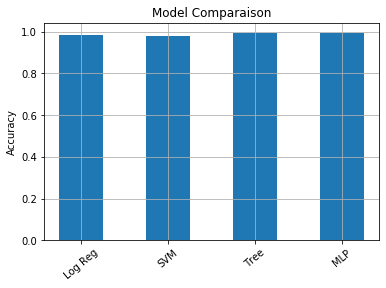

In [231]:
# Plotting a histogram comparing the models's accuracy

x = [1,2,3,4]
height = [logreg_score_testset,svm_score_testset,nn_score_testset,nn_score_testset]
width = 0.5
BarName = ["Log Reg", "SVM", "Tree", "MLP"]

plt.bar(x, height, width)

plt.grid()

plt.ylabel('Accuracy')
plt.title('Model Comparaison')

pylab.xticks(x, BarName, rotation=40)

plt.show()

## Conclusions

From raw data, we managed to create a model that predict pretty well which exercice is done by looking at the features. <br>

- First, we imported our .csv files to the notebook using Pandas, and named the columns and values to what they physically mean to get better sense of the problem.

- Then, by plotting some of them, we looked at them and made a hypothesis to recude a continuous information to 2 scalars values (mean and variance of the signal).

- We claned the data and formated it so that we obtain 2 arrays X and y that will be usable to train our models.

- We used PCA projection to reduce our 90 features to 2 components so that we could visualize it in a 2D plan.

- We re-used PCA, this time to dimentionally reduce our number of features so that we keep 90% of the data variance.

- With our new data, we train all 4 models (Logistic Regression, SVM, Decision Tree and MLP) on our X_train set, and check its accuracy on a set that the model has never seen before X_test to see how well it manages to guess the exercice given the sensors's information

All 4 models did pretty well predicting the exercises, as their accuracy on test set goes higher than 90%, proving that our models predicts well without overfitting.